# Project HR

Predict attrition of your valuable employees

[IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
df = pd.read_csv("./data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [148]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [149]:
df.shape # Attrition, PerformanceRating

(1470, 35)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [151]:
# df.isnull().sum().plot(kind="bar", title="Missing Values")
import plotly.graph_objects as go
fig = go.Figure([go.Bar(
                x=df.isnull().sum().index, 
                y=df.isnull().sum())
                ])
fig.update_layout(title='NaN values by column', width=1200)
fig.show()

In [152]:
for i in df:
    print('*************************************************************')
    print('Column name', i, '      column type', df[i].dtypes)
    print(df[i].unique())

*************************************************************
Column name Age       column type int64
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
*************************************************************
Column name Attrition       column type object
['Yes' 'No']
*************************************************************
Column name BusinessTravel       column type object
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
*************************************************************
Column name DailyRate       column type int64
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082 

In [153]:
# drop unneccesary columns: EmployeeNumber, DailyRate
columns_to_drop = ['DailyRate', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']

def removeColumns(columns):
    for i in columns:
        if i in df:
            df.drop(i, inplace=True, axis=1)

removeColumns(columns_to_drop)

In [154]:
df.shape

(1470, 30)

In [155]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [156]:
# get only numerical and analize them
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = df.select_dtypes(include=numerics)

category = df.select_dtypes(include=object)

In [157]:
numeric.iloc[:,:12].head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike
0,41,1,2,2,94,3,2,4,5993,19479,8,11
1,49,8,1,3,61,2,2,2,5130,24907,1,23
2,37,2,2,4,92,2,1,3,2090,2396,6,15
3,33,3,4,4,56,3,1,3,2909,23159,1,11
4,27,2,1,1,40,3,1,2,3468,16632,9,12


# EDA

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

In [159]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

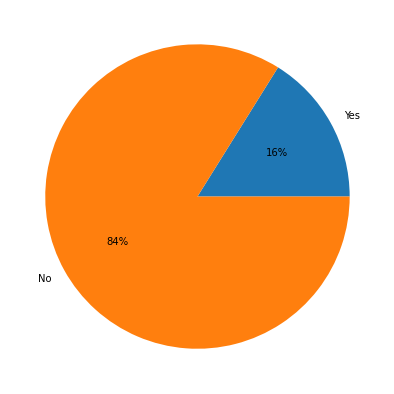

In [160]:
plt.figure(figsize = (7,7))
NO, YES = df['Attrition'].value_counts()[0], df['Attrition'].value_counts()[1]
data = [YES / (NO + YES) * 100, NO / (NO + YES) * 100]
plt.pie(data, labels = ['Yes', 'No'], autopct='%.0f%%')
plt.show()


plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['Attrition'])
data['Attrition'].value_counts()

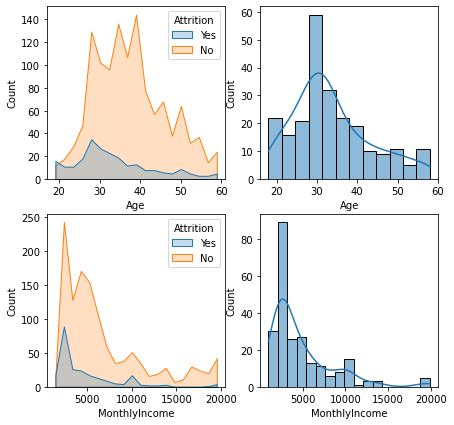

In [161]:
plt.figure(figsize = (7,7))

subplot(2,2,1)
sns.histplot(df, x="Age", hue="Attrition", element="poly")

subplot(2,2,2)
sns.histplot(data=df[df.Attrition == 'Yes'], x="Age", kde=True)

subplot(2,2,3)
sns.histplot(df, x="MonthlyIncome", hue="Attrition", element="poly")

subplot(2,2,4)
sns.histplot(data=df[df.Attrition == 'Yes'], x="MonthlyIncome",  kde=True)

plt.show()


<AxesSubplot:xlabel='OverTime', ylabel='Count'>

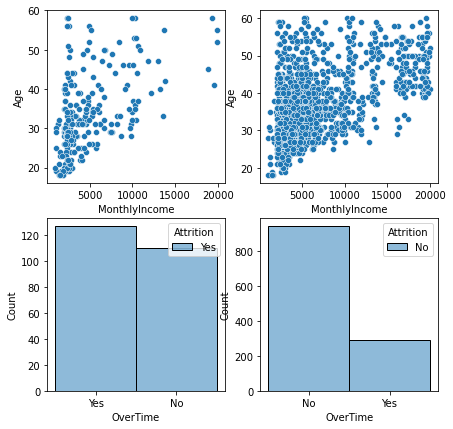

In [299]:
plt.figure(figsize = (7,7))

subplot(2,2,1)
sns.scatterplot(data=df[df.Attrition == 'Yes'], x="MonthlyIncome", y="Age")

subplot(2,2,2)
sns.scatterplot(data=df[df.Attrition == 'No'], x="MonthlyIncome", y="Age")

subplot(2,2,3)
sns.histplot(data=df[df.Attrition == 'Yes'], x="OverTime", hue='Attrition')

subplot(2,2,4)
sns.histplot(data=df[df.Attrition == 'No'], x="OverTime", hue='Attrition')


<AxesSubplot:xlabel='Gender', ylabel='Count'>

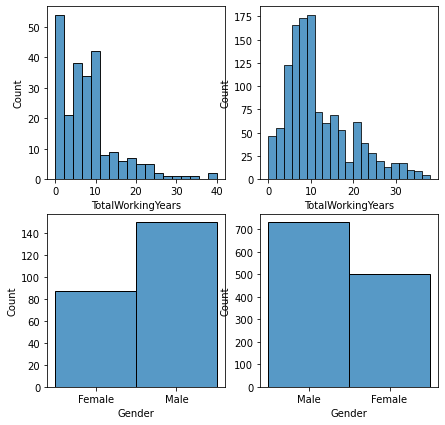

In [294]:
plt.figure(figsize = (7,7))

subplot(2,2,1)
sns.histplot(data=df[df.Attrition == 'Yes'], x="TotalWorkingYears")

subplot(2,2,2)
sns.histplot(data=df[df.Attrition == 'No'], x="TotalWorkingYears")

subplot(2,2,3)
sns.histplot(data=df[df.Attrition == 'Yes'], x="Gender")

subplot(2,2,4)
sns.histplot(data=df[df.Attrition == 'No'], x="Gender")

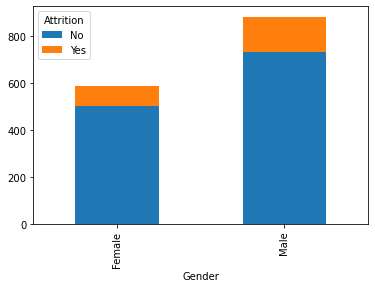

In [297]:
df_plot_Gen = df.groupby(['Attrition', 'Gender']).size().reset_index().pivot(columns = 'Attrition', index = 'Gender', values = 0)
df_plot_Gen.plot(kind = 'bar', stacked = True)
plt.show()

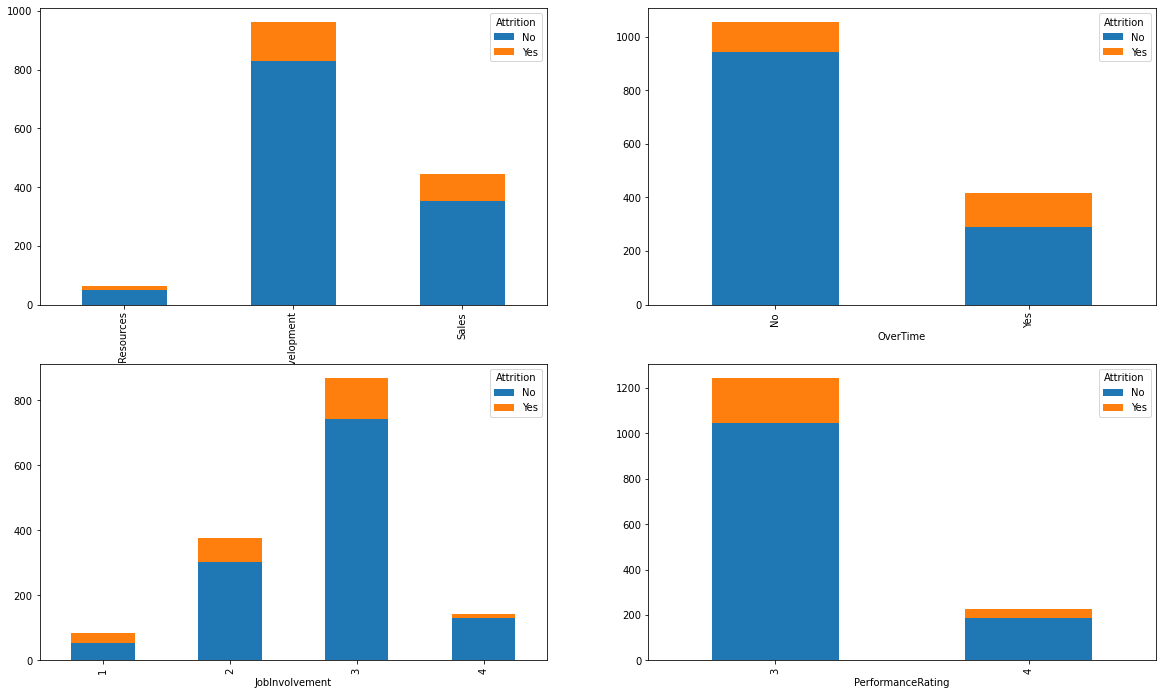

In [298]:
df_plot_Dep = df.groupby(['Attrition', 'Department']).size().reset_index().pivot(columns = 'Attrition', index = 'Department', values = 0)
df_plot_Ove = df.groupby(['Attrition', 'OverTime']).size().reset_index().pivot(columns = 'Attrition', index = 'OverTime', values = 0)
df_plot_Inv = df.groupby(['Attrition', 'JobInvolvement']).size().reset_index().pivot(columns = 'Attrition', index = 'JobInvolvement', values = 0)
df_plot_Per = df.groupby(['Attrition', 'PerformanceRating']).size().reset_index().pivot(columns = 'Attrition', index = 'PerformanceRating', values = 0)

fig, ax = plt.subplots(2, 2, figsize = (20, 12))
df_plot_Dep.plot(kind = 'bar', stacked = True, ax = ax[0,0])
df_plot_Ove.plot(kind = 'bar', stacked = True, ax = ax[0,1])
df_plot_Inv.plot(kind = 'bar', stacked = True, ax = ax[1,0])
df_plot_Per.plot(kind = 'bar', stacked = True, ax = ax[1,1])
plt.show()

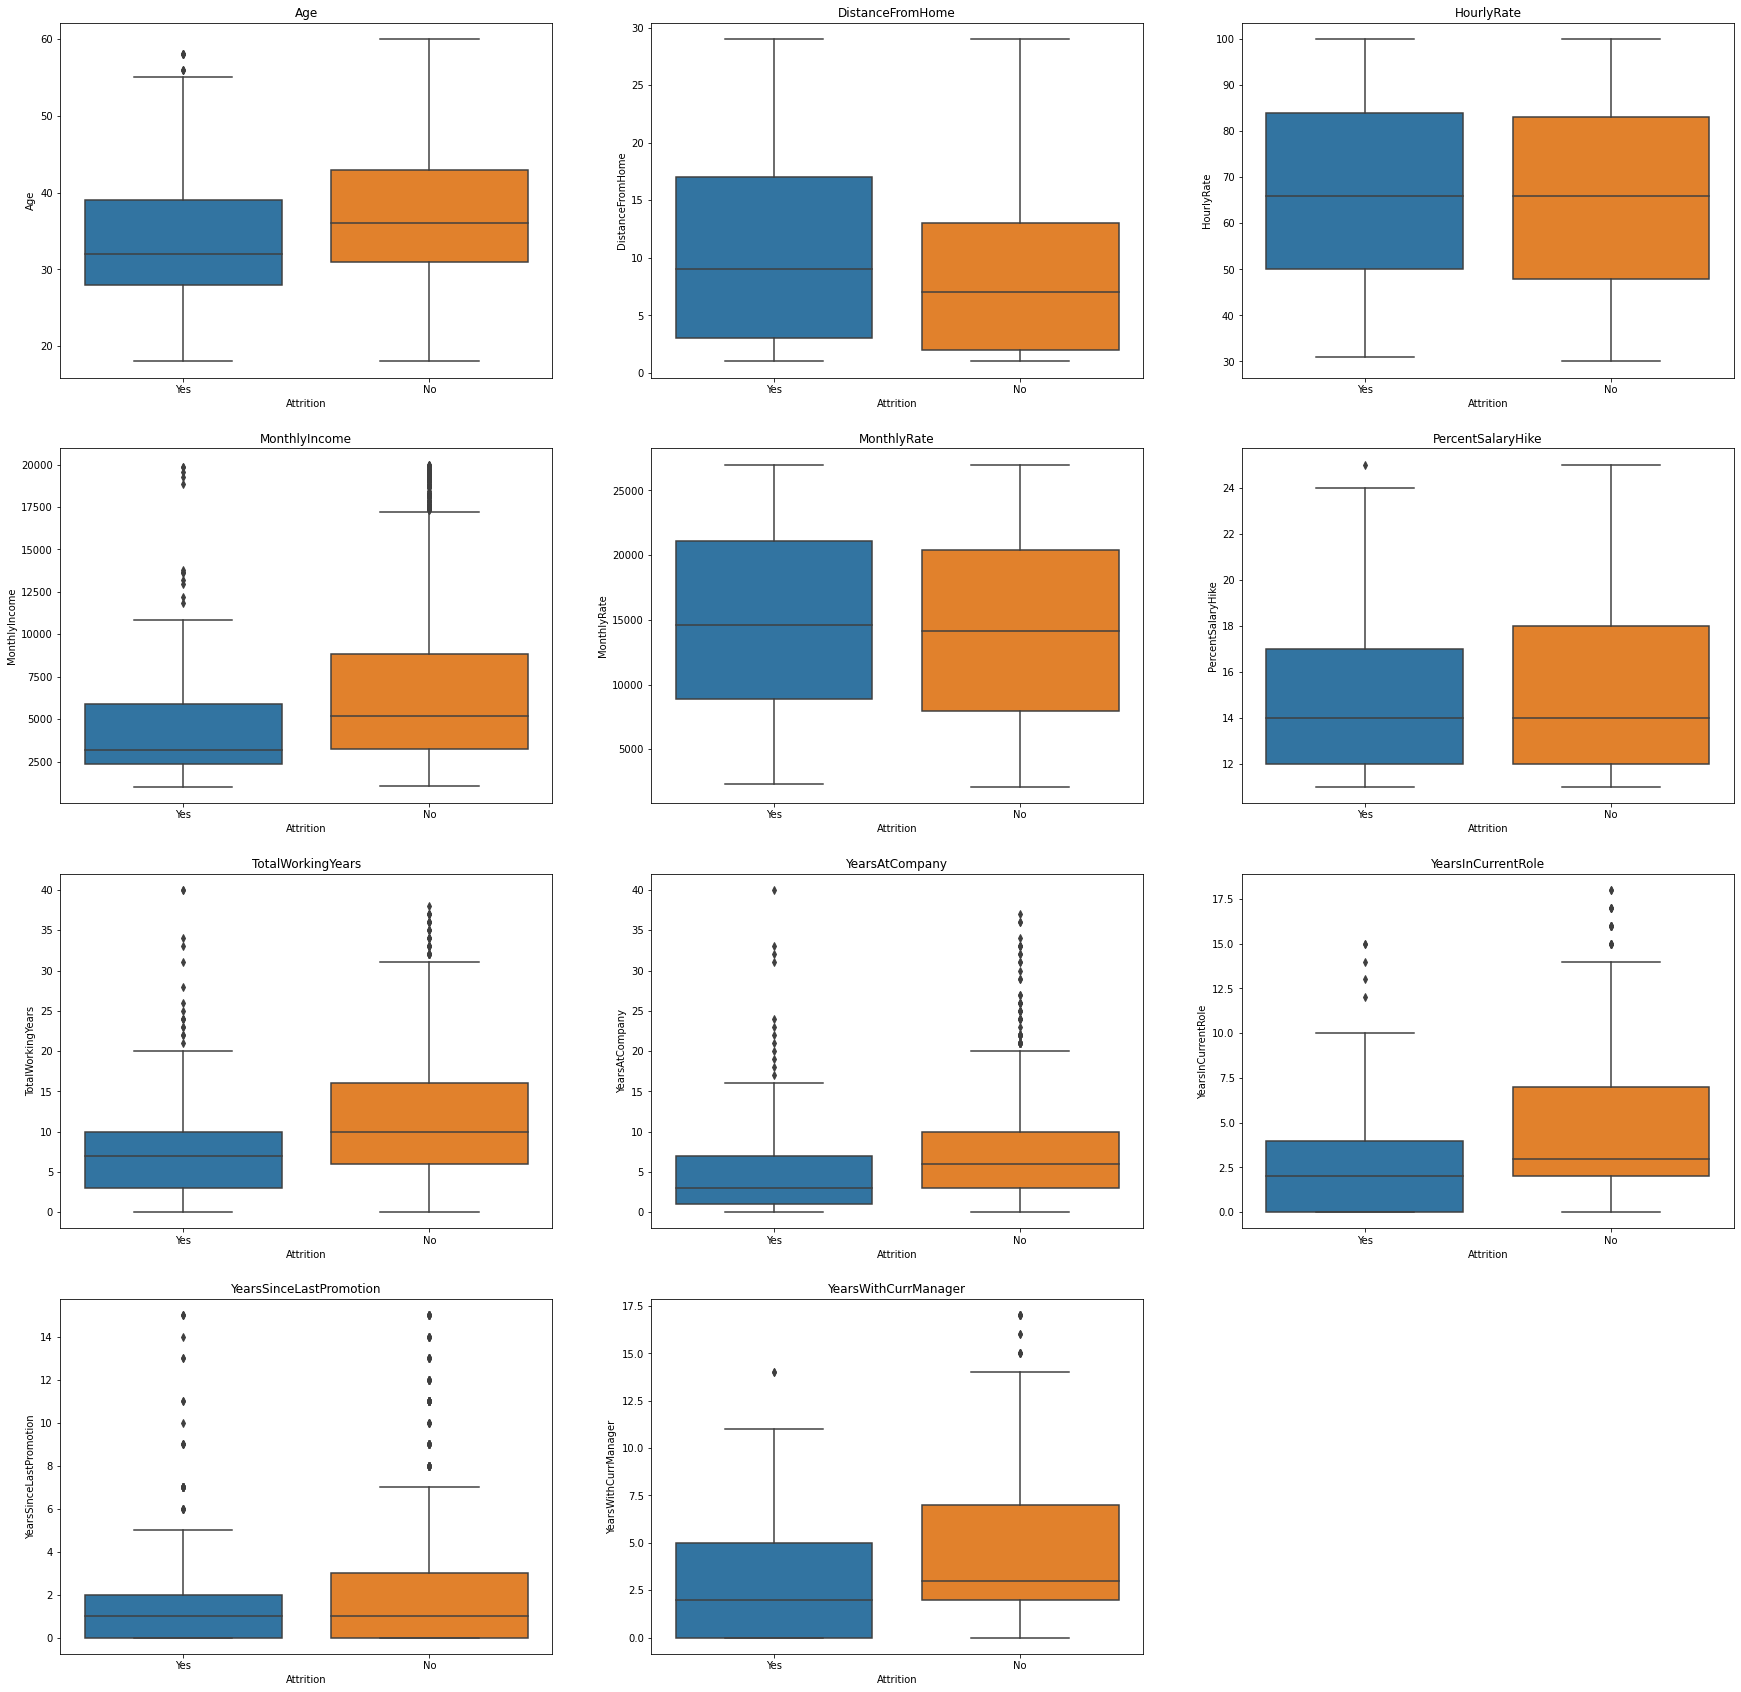

In [302]:
#Numerical Features
num_features = ['Age','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
                'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

plt.figure(figsize = (30,30))
for i,feature in enumerate(num_features):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(y = df[feature], x = df['Attrition'])
    ax.set_title(feature)

# Start applying Modeling

In [163]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Plan of attack:

* More plots
* Split
* Tree
* Random
* Adaboots: https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f
* Ensamble
* 


In [164]:
## Experimental Split data on and on without errors in notebook

# def splitDataset():
#     X = df.copy()
#     y = ''
#     if 'Attrition' in X:
#         y = df.Attrition
#         X.pop('Attrition')
#     return X, y

# X, y = splitDataset()

In [165]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [166]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [167]:
for i in df:
    print('Column name:', i, '\t\t\t\ttype:', df[i].dtypes)

Column name: Age 				type: int64
Column name: Attrition 				type: object
Column name: BusinessTravel 				type: object
Column name: Department 				type: object
Column name: DistanceFromHome 				type: int64
Column name: Education 				type: int64
Column name: EducationField 				type: object
Column name: EnvironmentSatisfaction 				type: int64
Column name: Gender 				type: object
Column name: HourlyRate 				type: int64
Column name: JobInvolvement 				type: int64
Column name: JobLevel 				type: int64
Column name: JobRole 				type: object
Column name: JobSatisfaction 				type: int64
Column name: MaritalStatus 				type: object
Column name: MonthlyIncome 				type: int64
Column name: MonthlyRate 				type: int64
Column name: NumCompaniesWorked 				type: int64
Column name: OverTime 				type: object
Column name: PercentSalaryHike 				type: int64
Column name: PerformanceRating 				type: int64
Column name: RelationshipSatisfaction 				type: int64
Column name: StockOptionLevel 				type: int64
Column 

In [168]:
# select categorical and numerical features
df.select_dtypes(['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [169]:
bustra = pd.get_dummies(X['BusinessTravel'], prefix='BusinessTravel')
bustra.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [170]:
# gender = pd.get_dummies(df.Gender, prefix='Gender')
# job_role = pd.get_dummies(df.JobRole, prefix='JobRole')
# marital_status = pd.get_dummies(df.MaritalStatus, prefix='MaritalStatus') 
# over_time = pd.get_dummies(df.OverTime, prefix='OverTime')
# buss_travel = pd.get_dummies(df.BusinessTravel, prefix='BusinessTravel')
# dept = pd.get_dummies(df.Department, prefix='Department') 
# educ_field = pd.get_dummies(df.EducationField, prefix='EducationField')

# df_onehot = pd.concat([gender, 
#                     job_role, 
#                     marital_status, 
#                     over_time, 
#                     buss_travel, 
#                     dept, 
#                     educ_field, 
#                     df.select_dtypes(['int64'])], axis=1)

def onehot():
    """Encode categorical and combine categorical and numerical in one df"""
    new_list = [df.select_dtypes(['int64'])]
    for i in X.select_dtypes(['object']).columns:
        temp = pd.get_dummies(X[i], prefix=i)
        new_list.append(temp)
    return pd.concat(new_list, axis=1)
    
df_ = onehot()


In [171]:
# ax = sns.heatmap(numeric.iloc[:,:12], annot=True, fmt="d")
df_.shape

(1470, 50)

## LabelBinarizer
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

* Note: Dont need Binarizer with xgboost classifier. Turn the categorical target to True or False? 

In [172]:
from sklearn import preprocessing
bin = preprocessing.LabelBinarizer()

In [173]:
y = bin.fit_transform(y)
print(np.unique(y), y.shape) # now is a numpy

[0 1] (1470, 1)


# Decision Tree

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(df_, y)


In [175]:
tree_cl1 = DecisionTreeClassifier(random_state=42) 

In [176]:
tree_cl1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [177]:
# test in sample
# very high at first glance, do we have overfitting?
print(
    'accuracy_score', accuracy_score(y_train, tree_cl1.predict(X_train)),'\n',
    'classification_report\n', classification_report(y_train, tree_cl1.predict(X_train)), '\n',
    'confusion matrix\n', confusion_matrix(y_train, tree_cl1.predict(X_train))
)
# We have overfitting
print(
    'accuracy_score: ', accuracy_score(y_test, tree_cl1.predict(X_test)),'\n',
    'classification_report\n', classification_report(y_test, tree_cl1.predict(X_test)), '\n',
    'confusion matrix\n', confusion_matrix(y_test, tree_cl1.predict(X_test))
)

accuracy_score 1.0 
 classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102
 
 confusion matrix
 [[930   0]
 [  0 172]]
accuracy_score:  0.8070652173913043 
 classification_report
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       303
           1       0.45      0.40      0.42        65

    accuracy                           0.81       368
   macro avg       0.66      0.65      0.65       368
weighted avg       0.80      0.81      0.80       368
 
 confusion matrix
 [[271  32]
 [ 39  26]]


In [178]:
# from sklearn.model_selection import cross_validate
# from sklearn.datasets import  load_iris
# from sklearn.svm import SVC

# iris = load_iris()
# clf = SVC()
# scoring = {'acc': 'accuracy',
#            'prec_macro': 'precision_macro',
#            'rec_micro': 'recall_macro'}
# scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,
#                          cv=5, return_train_score=True)
# print(scores.keys())
# print(scores['test_acc']) 

In [179]:
## agnosctic function for train and test scores for all model classifiers
def scores(cl, X_train, y_train, X_test, y_test, train=True, cv=2): 
    """ render accuracy, classification report and confusion matrix scores for train and test
        in order to compare them
        cl: as classifier (Tree, RandomForest, etc)
    """
    if train:
        print('\n***************************** Training ****************************************************')
        print(f'Accuracy:\t\t {accuracy_score(y_train, cl.predict(X_train))} \n')
        print(f'Classification Report:\n {classification_report(y_train, cl.predict(X_train))}')
        print(f'Confusion Matrix:\n {confusion_matrix(y_train, cl.predict(X_train))}')
        print("******Cross Validation Number:",cv)
        cv_score = cross_val_score(cl, X_train, y_train.ravel(), cv=cv, scoring='accuracy')
        print('Avg accuracy:', np.mean(cv_score))
        print('Accuracy standard dev:', np.std(cv_score))
        
    else:
        print('\n***************************** Testing ****************************************************')
        print(f'Accuracy:\t\t {accuracy_score(y_test, cl.predict(X_test))}')
        print(f'Classification Report:\n {classification_report(y_test, cl.predict(X_test))}')
        print(f'Confusion Matrix:\n {confusion_matrix(y_test, cl.predict(X_test))}')
    


## Bagging
Using Tree Classifier

In [180]:
# pass tree classifier previously created
from sklearn.ensemble import BaggingClassifier
b_clf = BaggingClassifier(
    base_estimator=tree_cl1, 
    n_estimators=100, 
    bootstrap=True, 
    n_jobs=-1, 
    random_state=42)

In [181]:
"""need to use ravel: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 
for example using ravel()
"""
b_clf.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [182]:
scores(b_clf, X_train, y_train, X_test, y_test, train=True, cv=10)
scores(b_clf, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[930   0]
 [  0 172]]
******Cross Validation Number: 10
Avg accuracy: 0.8557248157248157
Accuracy standard dev: 0.021960593335864986

***************************** Testing ****************************************************
Accuracy:		 0.8233695652173914
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       303
           1       0.50      0.18      0.27        65

    accuracy                           0.82       368
   macro avg       0

## RandomForest Classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [185]:
scores(rf_clf, X_train, y_train, X_test, y_test, train=True, cv=10)
scores(rf_clf, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[930   0]
 [  0 172]]
******Cross Validation Number: 10
Avg accuracy: 0.8647829647829648
Accuracy standard dev: 0.010415874550069083

***************************** Testing ****************************************************
Accuracy:		 0.845108695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       303
           1       0.75      0.18      0.30        65

    accuracy                           0.85       368
   macro avg       0.

In [186]:
rf_clf.feature_importances_


array([0.06473765, 0.05025346, 0.02033782, 0.02982422, 0.05140268,
       0.02691632, 0.02119718, 0.02067   , 0.08247824, 0.04413516,
       0.03334737, 0.03592194, 0.00453223, 0.02369528, 0.02226117,
       0.05536454, 0.02504454, 0.02469537, 0.04017528, 0.02756445,
       0.02035611, 0.02726556, 0.00483398, 0.01688405, 0.00641194,
       0.00353849, 0.00599736, 0.00874447, 0.00302996, 0.00864437,
       0.00530452, 0.00766072, 0.00327227, 0.00793405, 0.00903329,
       0.00756813, 0.00399736, 0.00346095, 0.01104791, 0.00117984,
       0.00300737, 0.00143983, 0.0085846 , 0.0080694 , 0.00761936,
       0.00684565, 0.00858263, 0.01855813, 0.03539682, 0.03117599])

In [187]:
pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False).count()

50

<AxesSubplot:>

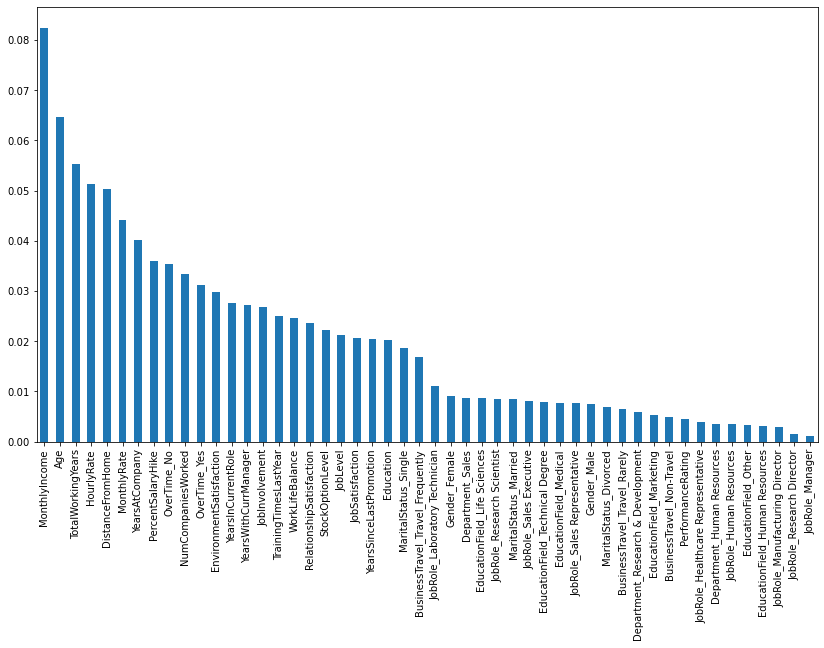

In [188]:
pd.Series(
    rf_clf.feature_importances_, 
    index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(14,8))

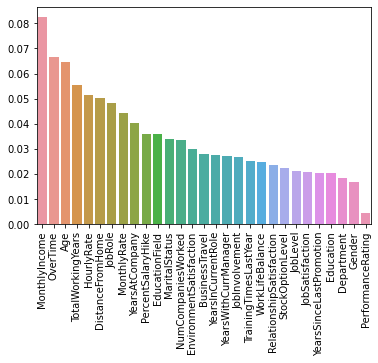

In [268]:
tmp = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

thedict = {}
for i, j in zip(tmp, tmp.index):
    if '_' in j:
        key = j.split('_')[0]
        if key in thedict.keys():
            thedict[f'{key}'] += i 
        else:
            thedict[f'{key}'] = i
    else:
        thedict[f'{j}'] = i

thedict = dict(sorted(thedict.items(), key=lambda item: item[1], reverse=True))
keys = list(thedict.keys())
vals = list(thedict.values())

print()

plt.figsize=(14,8)
ax= sns.barplot(x=keys, y=vals)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()


In [270]:
df.OverTime

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

## AdaBoost

In [190]:
from sklearn.ensemble import AdaBoostClassifier

In [191]:
a_clf = AdaBoostClassifier()
a_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier()

In [192]:
scores(a_clf, X_train, y_train, X_test, y_test, train=True)
scores(a_clf, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 0.9083484573502723 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       930
           1       0.84      0.51      0.63       172

    accuracy                           0.91      1102
   macro avg       0.88      0.74      0.79      1102
weighted avg       0.90      0.91      0.90      1102

Confusion Matrix:
 [[914  16]
 [ 85  87]]
******Cross Validation Number: 2
Avg accuracy: 0.8493647912885662
Accuracy standard dev: 0.0

***************************** Testing ****************************************************
Accuracy:		 0.8695652173913043
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92       303
           1       0.73      0.42      0.53        65

    accuracy                           0.87       368
   macro avg       0.81

## Ada and RandomForest

In [193]:
ada_clf2 = AdaBoostClassifier(RandomForestClassifier())
ada_clf2.fit(X_train, y_train.ravel())

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [194]:
scores(ada_clf2, X_train, y_train, X_test, y_test, train=True)
scores(ada_clf2, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[930   0]
 [  0 172]]
******Cross Validation Number: 2
Avg accuracy: 0.8602540834845736
Accuracy standard dev: 0.0018148820326678305

***************************** Testing ****************************************************
Accuracy:		 0.8342391304347826
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       303
           1       0.61      0.17      0.27        65

    accuracy                           0.83       368
   macro avg       0

***

## Gradient Boosting Classifier

In [195]:
from sklearn.ensemble import GradientBoostingClassifier

In [196]:
g_clf = GradientBoostingClassifier()
g_clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [197]:
scores(g_clf, X_train, y_train, X_test, y_test, train=True)
scores(g_clf, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 0.9600725952813067 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       930
           1       0.99      0.75      0.85       172

    accuracy                           0.96      1102
   macro avg       0.97      0.87      0.92      1102
weighted avg       0.96      0.96      0.96      1102

Confusion Matrix:
 [[929   1]
 [ 43 129]]
******Cross Validation Number: 2
Avg accuracy: 0.8557168784029039
Accuracy standard dev: 0.004537205081669715

***************************** Testing ****************************************************
Accuracy:		 0.8396739130434783
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       303
           1       0.64      0.22      0.32        65

    accuracy                           0.84       368
   mac

## XGBoost

In [198]:
import xgboost as xgb

In [199]:
type(y_train)

numpy.ndarray

In [200]:
x_clf = xgb.XGBClassifier()
x_clf.fit(X_train, y_train.ravel())

C:\Users\50687\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [201]:
scores(x_clf, X_train, y_train, X_test, y_test, train=True)
scores(x_clf, X_train, y_train, X_test, y_test, train=False)

C:\Users\50687\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[930   0]
 [  0 172]]
******Cross Validation Number: 2
Avg accuracy: 0.8575317604355717
Accuracy standard dev: 0.00453720508166966

***************************** Testing ****************************************************
Accuracy:		 0.8505434782608695
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       303
           1       0.65      0.34      0.44        65

    accuracy                           0.85       368
   macro avg       0.7

C:\Users\50687\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



In [202]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [203]:
## check unbalance df

imbalancedf = round((df.Attrition.value_counts() / df.Attrition.count()) * 100)
imbalancedf

No     84.0
Yes    16.0
Name: Attrition, dtype: float64

## Model Stacking

### 1. Decision Tree

In [204]:
tree_clf3 = DecisionTreeClassifier()
tree_clf3.fit(X_train, y_train)

DecisionTreeClassifier()

In [205]:
scores(tree_clf3, X_train, y_train, X_test, y_test, train=True)
scores(tree_clf3, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[930   0]
 [  0 172]]
******Cross Validation Number: 2
Avg accuracy: 0.7540834845735027
Accuracy standard dev: 0.011796733212341204

***************************** Testing ****************************************************
Accuracy:		 0.7663043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       303
           1       0.34      0.35      0.35        65

    accuracy                           0.77       368
   macro avg       0.

### 2. Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
rf_clf3 = RandomForestClassifier()
rf_clf3.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [208]:
scores(rf_clf3, X_train, y_train, X_test, y_test, train=True)
scores(rf_clf3, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[930   0]
 [  0 172]]
******Cross Validation Number: 2
Avg accuracy: 0.8611615245009074
Accuracy standard dev: 0.0027223230490017736

***************************** Testing ****************************************************
Accuracy:		 0.8478260869565217
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       303
           1       0.76      0.20      0.32        65

    accuracy                           0.85       368
   macro avg       0

In [209]:
ensembles = pd.DataFrame()
ensembles['tree_clf3'] = pd.DataFrame(tree_clf3.predict_proba(X_train))[1]
ensembles['rf_clf3'] = pd.DataFrame(rf_clf3.predict_proba(X_train))[1]
ensembles = pd.concat([ensembles, pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
ensembles.rename({0: 'ind'}, axis=1, inplace=True)

In [210]:
ensembles.head()

,tree_clf3,rf_clf3,ind
0,0.0,0.02,0
1,0.0,0.01,0
2,1.0,0.76,1
3,0.0,0.00,0
4,0.0,0.11,0


## Meta Classifier
Ensemble different classifiers (LogisticRegression)

In [211]:
from sklearn.linear_model import LogisticRegression

In [212]:
lr_clf = LogisticRegression(fit_intercept=False)

In [213]:
lr_clf.fit(ensembles[['tree_clf3', 'rf_clf3']], ensembles['ind'])

LogisticRegression(fit_intercept=False)

In [214]:
ensembles_test = pd.DataFrame()

In [215]:
ensembles_test['tree_clf3'] = pd.DataFrame(tree_clf3.predict_proba(X_test))[1]
ensembles_test['rf_clf3'] = pd.DataFrame(rf_clf3.predict_proba(X_test))[1]
ensembles_test['combined'] = lr_clf.predict(ensembles_test[['tree_clf3', 'rf_clf3']])
ensembles_test = pd.concat([ensembles_test, pd.DataFrame(y_test).reset_index(drop=True)], axis=1)
ensembles_test.rename({0: 'ind'}, axis=1, inplace=True)

In [216]:
pd.crosstab(ensembles_test['ind'], ensembles_test['combined'])

combined,0,1
ind,,
0,259,44
1,42,23


In [217]:
print(accuracy_score(ensembles_test['ind'], ensembles_test['combined']))

0.7663043478260869


In [218]:
print(classification_report(ensembles_test['ind'], ensembles_test['combined']))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       303
           1       0.34      0.35      0.35        65

    accuracy                           0.77       368
   macro avg       0.60      0.60      0.60       368
weighted avg       0.77      0.77      0.77       368



Unique classifier

In [219]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

In [220]:
imbalancedf

No     84.0
Yes    16.0
Name: Attrition, dtype: float64

In [221]:
weigth = {0:imbalancedf[0], 1:imbalancedf[1]}
weigth

{0: 84.0, 1: 16.0}

In [222]:
pd.Series(list(y_train.ravel())).value_counts() / pd.Series(list(y_train.ravel())).count()

0    0.84392
1    0.15608
dtype: float64

In [223]:
rf_clf4 = RandomForestClassifier(class_weight=weigth)
ada4 = AdaBoostClassifier(
    base_estimator=rf_clf4, 
    n_estimators=1000, 
    learning_rate=0.5, random_state=42)

In [224]:
ada4.fit(X_train, y_train.ravel())

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight={0: 84.0,
                                                                       1: 16.0}),
                   learning_rate=0.5, n_estimators=1000, random_state=42)

In [225]:
scores(ada4, X_train, y_train, X_test, y_test, train=True)
scores(ada4, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[930   0]
 [  0 172]]
******Cross Validation Number: 2
Avg accuracy: 0.8575317604355717
Accuracy standard dev: 0.000907441016333943

***************************** Testing ****************************************************
Accuracy:		 0.842391304347826
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       303
           1       0.65      0.23      0.34        65

    accuracy                           0.84       368
   macro avg       0.7

In [226]:
bag_clf4 = BaggingClassifier(
            base_estimator=ada4,
            n_estimators=50,
            max_samples=1,
            max_features=1,
            bootstrap=True,
            bootstrap_features=False,
            n_jobs=-1,
            random_state=42)

In [227]:
bag_clf4.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight={0: 84.0,
                                                                                                        1: 16.0}),
                                                    learning_rate=0.5,
                                                    n_estimators=1000,
                                                    random_state=42),
                  max_features=1, max_samples=1, n_estimators=50, n_jobs=-1,
                  random_state=42)

In [228]:
# scores(bag_clf4, X_train, y_train, X_test, y_test, train=True)
# scores(bag_clf4, X_train, y_train, X_test, y_test, train=False)

In [229]:
# pip install deap update_checker tqdm stopit xgboost
# pip install dask[delayed] dask[dataframe] dask-ml fsspec>=0.3.3 distributed>=2.10.0
# pip install scikit-mdr skrebate

## TPOTClassifier

In [243]:
from tpot import TPOTClassifier

In [244]:
pipeline_optimizer = TPOTClassifier()
pipeline_optimizer = TPOTClassifier(generations=50, population_size=20, cv=10,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train.ravel())


Generation 1 - Current best internal CV score: 0.8783865683865683

Generation 2 - Current best internal CV score: 0.8801965601965602

Generation 3 - Current best internal CV score: 0.8801965601965602

Generation 4 - Current best internal CV score: 0.8801965601965602

Generation 5 - Current best internal CV score: 0.8902047502047502

Generation 6 - Current best internal CV score: 0.8902047502047502

Generation 7 - Current best internal CV score: 0.8902047502047502

Generation 8 - Current best internal CV score: 0.8902047502047502

Generation 9 - Current best internal CV score: 0.8902047502047502

Generation 10 - Current best internal CV score: 0.8902047502047502

Generation 11 - Current best internal CV score: 0.8902047502047502

Generation 12 - Current best internal CV score: 0.8902047502047502

Generation 13 - Current best internal CV score: 0.8902047502047502

Generation 14 - Current best internal CV score: 0.8902047502047502

Generation 15 - Current best internal CV score: 0.890204

TPOTClassifier(cv=10, generations=50, population_size=20, random_state=42,
               verbosity=2)

In [245]:
pipeline_optimizer.export('tpot_exported_pipeline.py')

# Own version

In [233]:
log_reg_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}, {"max_iter": 10000}]
dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
rand_for_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
kneighbors_params = [{"n_neighbors":3}, {"n_neighbors":5}]
naive_bayes_params = [{}]
svc_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]

In [234]:
modelclasses = [
    ["log regression", LogisticRegression, log_reg_params],
    # ["decision tree", DecisionTreeClassifier, dec_tree_params],
    # ["random forest", RandomForestClassifier, rand_for_params],
    # ["k neighbors", KNeighborsClassifier, kneighbors_params],
    # ["naive bayes", GaussianNB, naive_bayes_params],
    # ["support vector machines", SVC, svc_params]
]

In [235]:
# def insights(X_train, y_train, X_test, y_test):
#     insights = []
#     for modelname, Model, params_list in modelclasses:
#         for params in params_list:
#             model = Model(**params)
#             model.fit(X_train, y_train.ravel())
#             score = model.score(X_test, y_test.ravel())
#             insights.append((modelname, model, params, score))

#     return insights



# insights(X_train, y_train, X_test, y_test)

## Treat imbalance dataset

In [236]:
from imblearn.over_sampling import SMOTE

In [237]:
# Separate input features and target
X_ = df.drop('Attrition',axis=1)
y_ = df.Attrition

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.25, random_state=27)

In [238]:
# setting up testing and training sets
sm = SMOTE(random_state=42)
X_train_, y_train_ = sm.fit_resample(X_train, y_train)

In [239]:
X_train_.shape, y_train_.shape

((1860, 50), (1860,))

In [240]:
from sklearn.ensemble import RandomForestClassifier
rf_clf5 = RandomForestClassifier()
rf_clf5.fit(X_train_, y_train_.ravel())

RandomForestClassifier()

In [241]:
scores(rf_clf5, X_train, y_train, X_test, y_test, train=True)
scores(rf_clf5, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00       172

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[930   0]
 [  0 172]]
******Cross Validation Number: 2
Avg accuracy: 0.8593466424682396
Accuracy standard dev: 0.006352087114337546

***************************** Testing ****************************************************
Accuracy:		 0.8478260869565217
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       303
           1       0.67      0.28      0.39        65

    accuracy                           0.85       368
   macro avg       0.

In [257]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVC
from tpot.builtins import StackingEstimator, ZeroCount
from tpot.export_utils import set_param_recursive

In [258]:
exported_pipeline = make_pipeline(
    ZeroCount(),
    StackingEstimator(estimator=SGDClassifier(
                                                alpha=0.01, 
                                                eta0=0.1, 
                                                fit_intercept=True, 
                                                l1_ratio=0.0, 
                                                learning_rate="invscaling", 
                                                loss="squared_hinge", 
                                                penalty="elasticnet", 
                                                power_t=0.5)),
    LinearSVC(C=10.0, dual=False, loss="squared_hinge", penalty="l2", tol=1e-05)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

In [260]:
exported_pipeline.fit(X_train, y_train.ravel())

Pipeline(steps=[('zerocount', ZeroCount()),
                ('stackingestimator',
                 StackingEstimator(estimator=SGDClassifier(alpha=0.01, eta0=0.1,
                                                           l1_ratio=0.0,
                                                           learning_rate='invscaling',
                                                           loss='squared_hinge',
                                                           penalty='elasticnet',
                                                           random_state=42))),
                ('linearsvc',
                 LinearSVC(C=10.0, dual=False, random_state=42, tol=1e-05))])

In [261]:
results = exported_pipeline.predict(X_test)

In [262]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [264]:
def my_custom_accuracy(y_true, y_pred):
    return float(sum(y_pred == y_true)) / len(y_true)

# Make a custom a scorer from the custom metric function
# Note: greater_is_better=False in make_scorer below would mean that the scoring function should be minimized.
my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2,
                      scoring=my_custom_scorer)
tpot.fit(X_train, y_train.ravel())
print(tpot.score(X_test, y_test.ravel()))


Generation 1 - Current best internal CV score: 0.8747716988893458

Generation 2 - Current best internal CV score: 0.8747716988893458

Generation 3 - Current best internal CV score: 0.8747716988893458

Generation 4 - Current best internal CV score: 0.8747716988893458

Generation 5 - Current best internal CV score: 0.8774948580830934
                                                                              
Best pipeline: GradientBoostingClassifier(StandardScaler(VarianceThreshold(input_matrix, threshold=0.001)), learning_rate=0.1, max_depth=1, max_features=0.9000000000000001, min_samples_leaf=17, min_samples_split=17, n_estimators=100, subsample=0.3)
290.7119565217391


C:\Users\50687\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

